# Installing Packages

For Google colab

In [1]:
pip install catboost

# Impoting Packages

In [2]:
# Datframe packages
import pandas as pd

# Computational Packages
import numpy as np
from scipy import stats

# Time Packages
import time

# Visualization Packages
import matplotlib.pyplot as plt
%matplotlib inline
import missingno as msno
import seaborn as sb

# Warning Ignore
import warnings
warnings.filterwarnings("ignore")

# Data Preprocessing
## Imputation
from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer
## Label Encoding, Feature Scaling
from sklearn import preprocessing

# ML
## Train test split
from sklearn.model_selection import train_test_split
## Log regression
from sklearn.linear_model import LogisticRegression
## Support Vector machine
from sklearn import svm
## Decission Tree
from sklearn.tree import DecisionTreeClassifier
## Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
## xgboost
from xgboost import XGBClassifier
## catboost
from catboost import CatBoostClassifier
## Metrics
from sklearn.metrics import accuracy_score,classification_report,roc_auc_score,confusion_matrix

# Pickling Model
import pickle


# Data Overview

In [3]:
# Lets look at the data

url = "/content/weatherAUS.csv" # For Google colab(upload before running)
# url = "./weatherAUS.csv" # For local file
wth = pd.read_csv(url)
wth.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [4]:
# More about data
print("Rows & columns:" , wth.shape[0], "&", wth.shape[1])
print("Column names:" , [names for names in wth.columns])

Rows & columns: 145460 & 23
Column names: ['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday', 'RainTomorrow']


# Data Preprocessing

In [5]:
wth.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

From above we can see that there are lot of missing values in some columns. So, let's looks at them quantitatively as well as visually.

In [6]:
# Missing values in percentage
(wth.isnull().sum())*100/(len(wth))

Date              0.000000
Location          0.000000
MinTemp           1.020899
MaxTemp           0.866905
Rainfall          2.241853
Evaporation      43.166506
Sunshine         48.009762
WindGustDir       7.098859
WindGustSpeed     7.055548
WindDir9am        7.263853
WindDir3pm        2.906641
WindSpeed9am      1.214767
WindSpeed3pm      2.105046
Humidity9am       1.824557
Humidity3pm       3.098446
Pressure9am      10.356799
Pressure3pm      10.331363
Cloud9am         38.421559
Cloud3pm         40.807095
Temp9am           1.214767
Temp3pm           2.481094
RainToday         2.241853
RainTomorrow      2.245978
dtype: float64

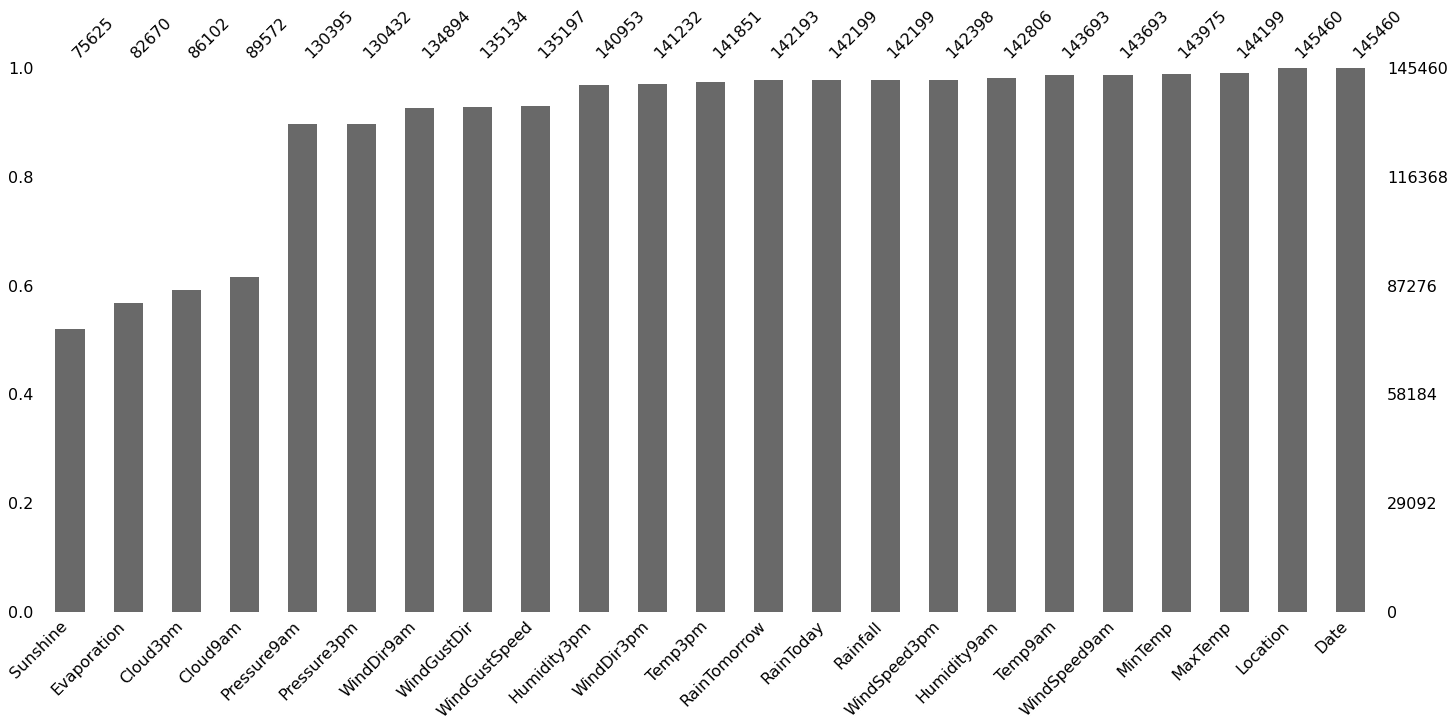

In [7]:
# Missing values visually

msno.bar(wth, sort='ascending')

## Classifying into categorical and numerical features

In [8]:
# Categorical & numerical data
cate_data = [feature for feature in wth.columns if wth[feature].dtypes=="object"]
num_data = [feature for feature in wth.columns if feature not in cate_data]

print("Categorical Data Columns:", cate_data)
print("Numerical Data Columns:", num_data)

Categorical Data Columns: ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']
Numerical Data Columns: ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']


## Cleaning of Numerical Data

### Interpolation & Imputation

In [9]:
no_intpol = ['Evaporation', 'Sunshine', 'Cloud9am', 'Cloud3pm']
intpol = [features for features in num_data if features not in no_intpol]

#### Interpolation of intpol features

In [10]:
intpol

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Temp9am',
 'Temp3pm']

In [11]:
for feature in intpol:
  wth[feature] = wth[feature].interpolate()

In [12]:
# Check if nulls
for feature in intpol:
  print(f"{feature} : {wth[feature].isnull().sum()*100/len(wth)}")

MinTemp : 0.0
MaxTemp : 0.0
Rainfall : 0.0
WindGustSpeed : 0.0
WindSpeed9am : 0.0
WindSpeed3pm : 0.0
Humidity9am : 0.0
Humidity3pm : 0.0
Pressure9am : 0.0
Pressure3pm : 0.0
Temp9am : 0.0
Temp3pm : 0.0


#### Simple Imputation of no_intpol

In [13]:
no_intpol

['Evaporation', 'Sunshine', 'Cloud9am', 'Cloud3pm']

In [14]:
sim_imputer = SimpleImputer(strategy="mean")

In [15]:
for feature in no_intpol:
  X = wth.iloc[:,wth.columns.get_loc(feature)].values
  X = X.reshape(-1,1)
  wth[feature] = sim_imputer.fit_transform(X)

In [16]:
# Check if nulls
for feature in no_intpol:
  print(f"{feature} : {wth[feature].isnull().sum()*100/len(wth)}")

Evaporation : 0.0
Sunshine : 0.0
Cloud9am : 0.0
Cloud3pm : 0.0


### Check nulls in num_data

In [17]:
for feature in num_data:
  print(f"{feature} : {wth[feature].isnull().sum()*100/len(wth)}")

MinTemp : 0.0
MaxTemp : 0.0
Rainfall : 0.0
Evaporation : 0.0
Sunshine : 0.0
WindGustSpeed : 0.0
WindSpeed9am : 0.0
WindSpeed3pm : 0.0
Humidity9am : 0.0
Humidity3pm : 0.0
Pressure9am : 0.0
Pressure3pm : 0.0
Cloud9am : 0.0
Cloud3pm : 0.0
Temp9am : 0.0
Temp3pm : 0.0


In [18]:
num_df = pd.DataFrame(wth[num_data])
num_df.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
0,13.4,22.9,0.6,5.468232,7.611178,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,4.50993,16.9,21.8
1,7.4,25.1,0.0,5.468232,7.611178,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,4.447461,4.50993,17.2,24.3
2,12.9,25.7,0.0,5.468232,7.611178,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,4.447461,2.00000,21.0,23.2
3,9.2,28.0,0.0,5.468232,7.611178,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,4.447461,4.50993,18.1,26.5
4,17.5,32.3,1.0,5.468232,7.611178,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.00000,17.8,29.7


In [19]:
num_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 16 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   MinTemp        145460 non-null  float64
 1   MaxTemp        145460 non-null  float64
 2   Rainfall       145460 non-null  float64
 3   Evaporation    145460 non-null  float64
 4   Sunshine       145460 non-null  float64
 5   WindGustSpeed  145460 non-null  float64
 6   WindSpeed9am   145460 non-null  float64
 7   WindSpeed3pm   145460 non-null  float64
 8   Humidity9am    145460 non-null  float64
 9   Humidity3pm    145460 non-null  float64
 10  Pressure9am    145460 non-null  float64
 11  Pressure3pm    145460 non-null  float64
 12  Cloud9am       145460 non-null  float64
 13  Cloud3pm       145460 non-null  float64
 14  Temp9am        145460 non-null  float64
 15  Temp3pm        145460 non-null  float64
dtypes: float64(16)
memory usage: 17.8 MB


## Handling Categorical Data

### Cleaning of Categorical Data

In [20]:
cate_data

['Date',
 'Location',
 'WindGustDir',
 'WindDir9am',
 'WindDir3pm',
 'RainToday',
 'RainTomorrow']

#### Nominal data type

Maping, interpolation & mode

In [21]:
# Mapping

wth_map = {"Yes":1,"No":0}

wth["RainToday"] = wth["RainToday"].map(wth_map)
wth["RainTomorrow"] = wth["RainTomorrow"].map(wth_map)

In [22]:
# Interpolation

wth["RainToday"] = wth["RainToday"].interpolate(limit=3)
wth["RainTomorrow"] = wth["RainTomorrow"].interpolate(limit=3)

In [23]:
# Reverse Mapping

wth_reverse_map = {1:"Yes",0:"No"}

wth["RainToday"] = wth["RainToday"].map(wth_reverse_map)
wth["RainTomorrow"] = wth["RainTomorrow"].map(wth_reverse_map)

In [24]:
# Replacing remaining nulls with mode

wth["RainToday"] = wth["RainToday"].fillna(wth["RainToday"].mode()[0])
wth["RainTomorrow"] = wth["RainTomorrow"].fillna(wth["RainTomorrow"].mode()[0])

#### Ordinal data type

Replacing nulls with mode

In [25]:
# For remainning categorical feature (ordinal) we'll use mode to fill nulls

cate_data_ordinal = ["WindGustDir", "WindDir9am","WindDir3pm"]

for feature in cate_data_ordinal:
  wth[feature] = wth[feature].fillna(wth[feature].mode()[0])

In [26]:
# Lets check if we have nulls in ordinal type data

for feature in cate_data_ordinal:
   print(f"{feature} : {wth[feature].isnull().sum()*100/len(wth)}")

WindGustDir : 0.0
WindDir9am : 0.0
WindDir3pm : 0.0


### Checking nulls in cate_data

In [27]:
# Lets check if we have nulls in cate_data

for feature in cate_data:
   print(f"{feature} : {wth[feature].isnull().sum()*100/len(wth)}")

Date : 0.0
Location : 0.0
WindGustDir : 0.0
WindDir9am : 0.0
WindDir3pm : 0.0
RainToday : 0.0
RainTomorrow : 0.0


In [28]:
cate_df = pd.DataFrame(wth[cate_data])
cate_df.head()

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,W,W,WNW,No,No
1,2008-12-02,Albury,WNW,NNW,WSW,No,No
2,2008-12-03,Albury,WSW,W,WSW,No,No
3,2008-12-04,Albury,NE,SE,E,No,No
4,2008-12-05,Albury,W,ENE,NW,No,No


### Dropping 'Date' column

In [29]:
wth_nd = wth.drop(["Date"],axis=1)

In [30]:
# Uncomment this to set dates as index

# wth_nd = wth_nd.set_index(wth["Date"])

### Label Encoding of Categorical Data

In [31]:
cate_data

['Date',
 'Location',
 'WindGustDir',
 'WindDir9am',
 'WindDir3pm',
 'RainToday',
 'RainTomorrow']

In [32]:
wth_nd.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,Albury,13.4,22.9,0.6,5.468232,7.611178,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,4.50993,16.9,21.8,No,No
1,Albury,7.4,25.1,0.0,5.468232,7.611178,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,4.447461,4.50993,17.2,24.3,No,No
2,Albury,12.9,25.7,0.0,5.468232,7.611178,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,4.447461,2.00000,21.0,23.2,No,No
3,Albury,9.2,28.0,0.0,5.468232,7.611178,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,4.447461,4.50993,18.1,26.5,No,No
4,Albury,17.5,32.3,1.0,5.468232,7.611178,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.00000,17.8,29.7,No,No


In [33]:
wth_nd_cate =  [feature for feature in wth_nd.columns if wth_nd[feature].dtypes=="object"]
wth_nd_cate

['Location',
 'WindGustDir',
 'WindDir9am',
 'WindDir3pm',
 'RainToday',
 'RainTomorrow']

In [34]:
# Check value counts & uniques before label encoding

for feature in wth_nd_cate:
  print(f"{feature} : -")
  print(f"Value Counts:\n{wth_nd[feature].value_counts()}")
  print(f"\nUniques:\n{wth_nd[feature].unique()}")
  print("------------------------------")

Location : -
Value Counts:
Canberra            3436
Sydney              3344
Darwin              3193
Brisbane            3193
Adelaide            3193
Hobart              3193
Melbourne           3193
Perth               3193
Albany              3040
MountGambier        3040
MountGinini         3040
Townsville          3040
Launceston          3040
Cairns              3040
Albury              3040
AliceSprings        3040
Wollongong          3040
Ballarat            3040
GoldCoast           3040
Bendigo             3040
Penrith             3039
Tuggeranong         3039
Newcastle           3039
Moree               3009
Sale                3009
CoffsHarbour        3009
SydneyAirport       3009
Woomera             3009
Richmond            3009
Portland            3009
Witchcliffe         3009
WaggaWagga          3009
BadgerysCreek       3009
Cobar               3009
Williamtown         3009
PerthAirport        3009
MelbourneAirport    3009
PearceRAAF          3009
Nuriootpa           300

In [35]:
le_loc = preprocessing.LabelEncoder()
le_wind_gust = preprocessing.LabelEncoder()
le_dir9 = preprocessing.LabelEncoder()
le_dir3= preprocessing.LabelEncoder()
le_rain_tod = preprocessing.LabelEncoder()
le_rain_tom = preprocessing.LabelEncoder()

In [36]:
wth_nd["Location"]=le_loc.fit_transform(wth_nd["Location"])
wth_nd["WindGustDir"]=le_wind_gust.fit_transform(wth_nd["WindGustDir"])
wth_nd["WindDir9am"]=le_dir9.fit_transform(wth_nd["WindDir9am"])
wth_nd["WindDir3pm"]=le_dir3.fit_transform(wth_nd["WindDir3pm"])
wth_nd["RainToday"]=le_rain_tod.fit_transform(wth_nd["RainToday"])
wth_nd["RainTomorrow"]=le_rain_tom.fit_transform(wth_nd["RainTomorrow"])

In [37]:
# Check value counts & uniques after label encoding

for feature in wth_nd_cate:
  print(f"{feature} : -")
  print(f"Value Counts:\n{wth_nd[feature].value_counts()}")
  print(f"\nUniques:\n{wth_nd[feature].unique()}")
  print("------------------------------")

Location : -
Value Counts:
9     3436
37    3344
7     3193
31    3193
18    3193
15    3193
13    3193
0     3193
8     3040
39    3040
47    3040
6     3040
5     3040
14    3040
3     3040
17    3040
2     3040
1     3040
22    3040
23    3040
24    3039
30    3039
40    3039
27    3009
35    3009
46    3009
45    3009
44    3009
4     3009
42    3009
38    3009
10    3009
11    3009
12    3009
48    3009
34    3009
33    3009
32    3009
19    3009
20    3009
21    3009
29    3009
28    3009
43    3006
26    3004
36    3001
16    1578
41    1578
25    1578
Name: Location, dtype: int64

Uniques:
[ 2  4 10 11 21 24 26 27 30 34 37 38 42 45 47  9 40 23  5  6 35 19 18 20
 25 33 44 12  7  8 14 39  0 22 28 48  1 46 29 32 31 36 43 15 17  3 13 16
 41]
------------------------------
WindGustDir : -
Value Counts:
13    20241
9      9418
3      9313
10     9216
0      9181
8      9168
15     9069
12     8967
11     8736
14     8252
7      8122
1      8104
2      7372
4      7133
6      6620
5  

## Check Dataframe Info

In [38]:
wth_nd.head(5)

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2,13.4,22.9,0.6,5.468232,7.611178,13,44.0,13,14,20.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,4.50993,16.9,21.8,0,0
1,2,7.4,25.1,0.0,5.468232,7.611178,14,44.0,6,15,4.0,22.0,44.0,25.0,1010.6,1007.8,4.447461,4.50993,17.2,24.3,0,0
2,2,12.9,25.7,0.0,5.468232,7.611178,15,46.0,13,15,19.0,26.0,38.0,30.0,1007.6,1008.7,4.447461,2.00000,21.0,23.2,0,0
3,2,9.2,28.0,0.0,5.468232,7.611178,4,24.0,9,0,11.0,9.0,45.0,16.0,1017.6,1012.8,4.447461,4.50993,18.1,26.5,0,0
4,2,17.5,32.3,1.0,5.468232,7.611178,13,41.0,1,7,7.0,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.00000,17.8,29.7,0,0


In [39]:
(wth_nd.isnull().sum())*100/(len(wth))

Location         0.0
MinTemp          0.0
MaxTemp          0.0
Rainfall         0.0
Evaporation      0.0
Sunshine         0.0
WindGustDir      0.0
WindGustSpeed    0.0
WindDir9am       0.0
WindDir3pm       0.0
WindSpeed9am     0.0
WindSpeed3pm     0.0
Humidity9am      0.0
Humidity3pm      0.0
Pressure9am      0.0
Pressure3pm      0.0
Cloud9am         0.0
Cloud3pm         0.0
Temp9am          0.0
Temp3pm          0.0
RainToday        0.0
RainTomorrow     0.0
dtype: float64

In [40]:
wth_nd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 22 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       145460 non-null  int64  
 1   MinTemp        145460 non-null  float64
 2   MaxTemp        145460 non-null  float64
 3   Rainfall       145460 non-null  float64
 4   Evaporation    145460 non-null  float64
 5   Sunshine       145460 non-null  float64
 6   WindGustDir    145460 non-null  int64  
 7   WindGustSpeed  145460 non-null  float64
 8   WindDir9am     145460 non-null  int64  
 9   WindDir3pm     145460 non-null  int64  
 10  WindSpeed9am   145460 non-null  float64
 11  WindSpeed3pm   145460 non-null  float64
 12  Humidity9am    145460 non-null  float64
 13  Humidity3pm    145460 non-null  float64
 14  Pressure9am    145460 non-null  float64
 15  Pressure3pm    145460 non-null  float64
 16  Cloud9am       145460 non-null  float64
 17  Cloud3pm       145460 non-nul

## Removing Outliers

We choose here continous features as we can see variation in it & not in discrete features(Cloud9am,Cloud3pm)

In [41]:
wth_nd_continuous_feature = [feature for feature in num_data if len(wth_nd[feature].unique())>25]
wth_nd_continuous_feature

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Temp9am',
 'Temp3pm']

### Checking Data before removing outliers

In [42]:
print('Shape of wth_nd before removing outliers', wth_nd.shape )

Shape of wth_nd before removing outliers (145460, 22)


### By Z-Score (Optional)

This is not recommended as not all continuous features from our data follow symmetric normal distribution (see below)

In [43]:
wth_nd_continuous_feature

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Temp9am',
 'Temp3pm']

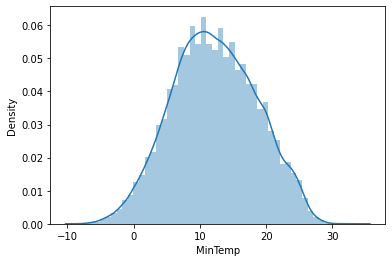

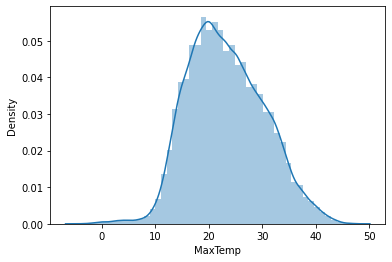

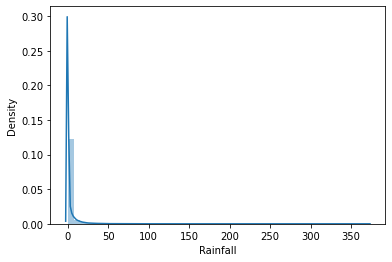

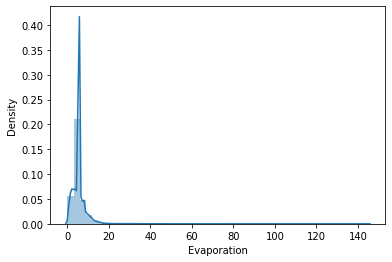

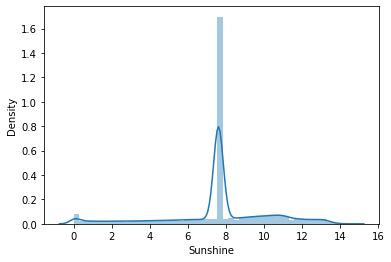

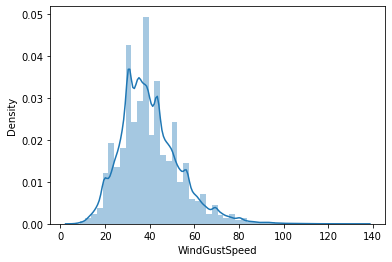

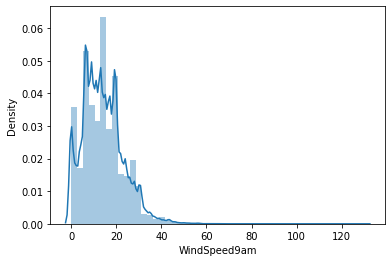

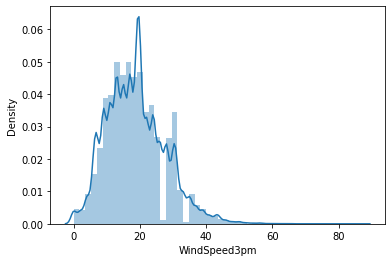

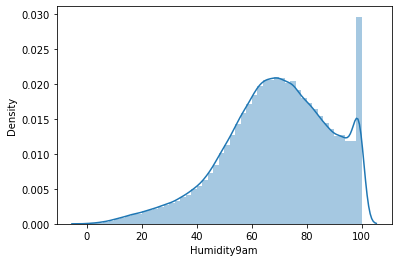

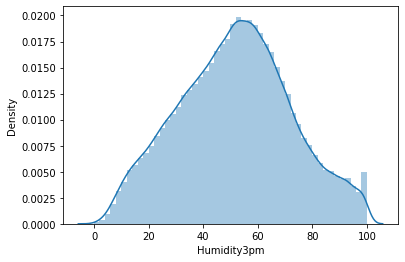

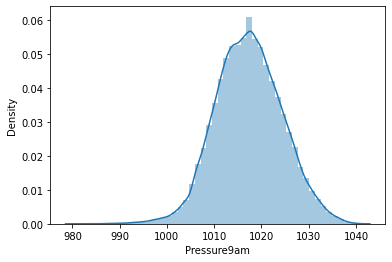

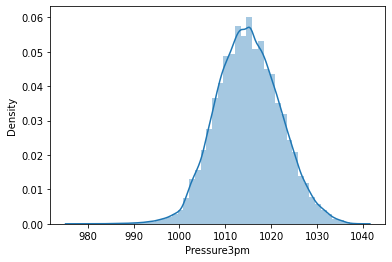

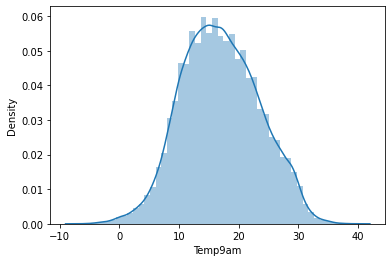

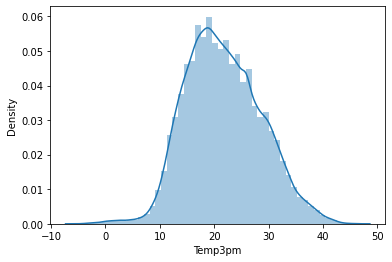

In [44]:
for feature in wth_nd_continuous_feature:
  sb.distplot(wth_nd[feature])
  plt.show()

Uncomment the code below to use Z-Score method for removing outliers

In [45]:
# wth_nd = wth_nd[(np.abs(stats.zscore(wth_nd)) < 3).all(axis=1)]

### By IQR

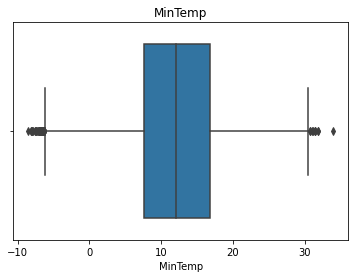

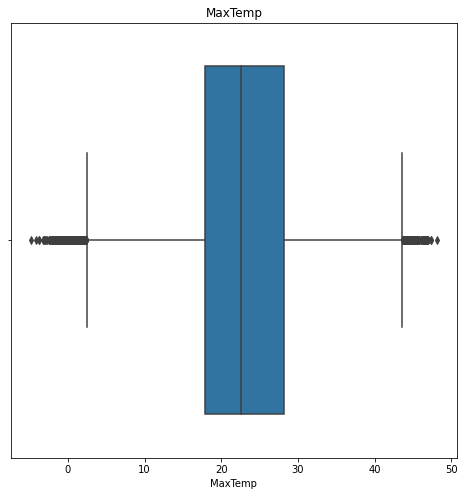

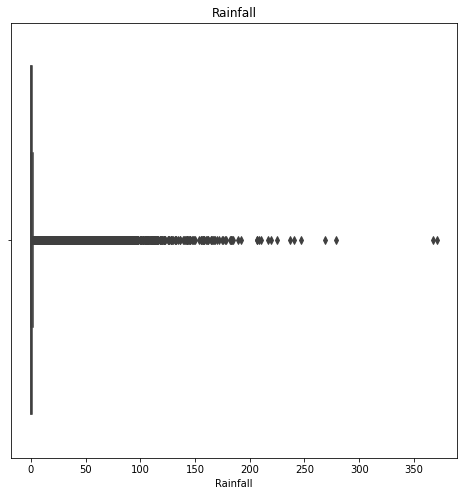

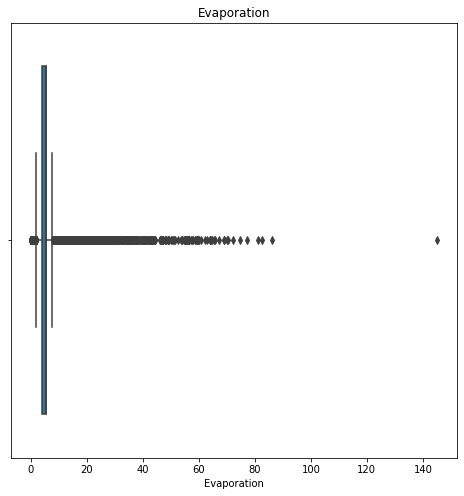

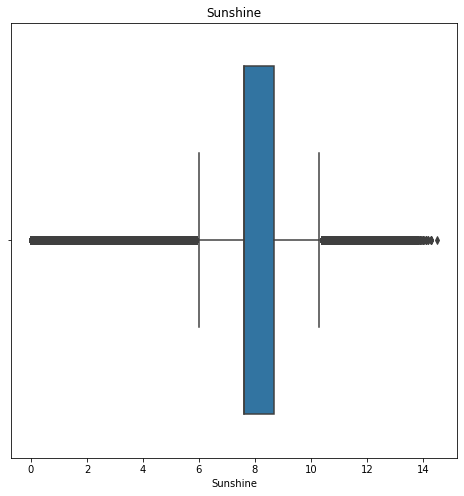

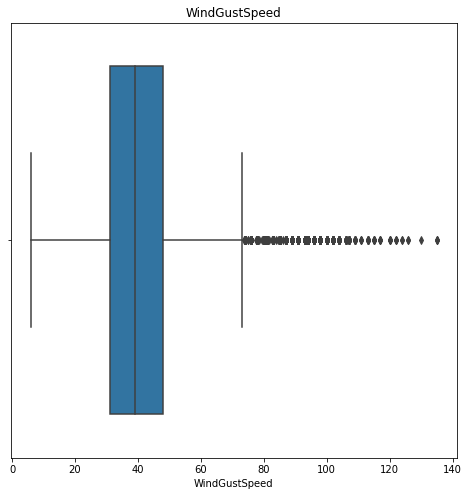

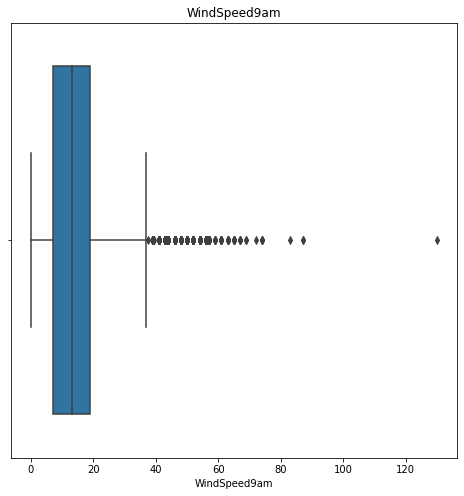

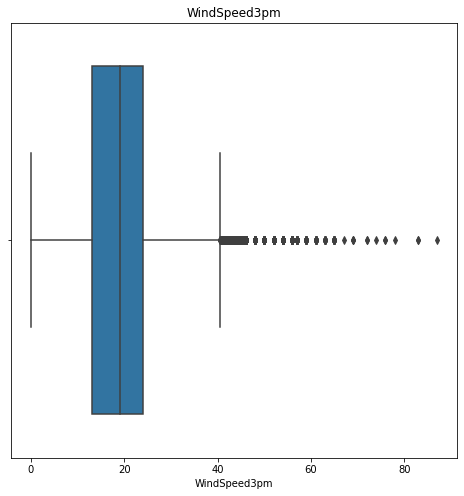

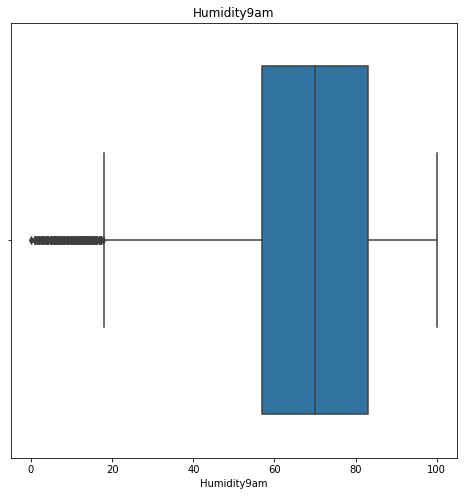

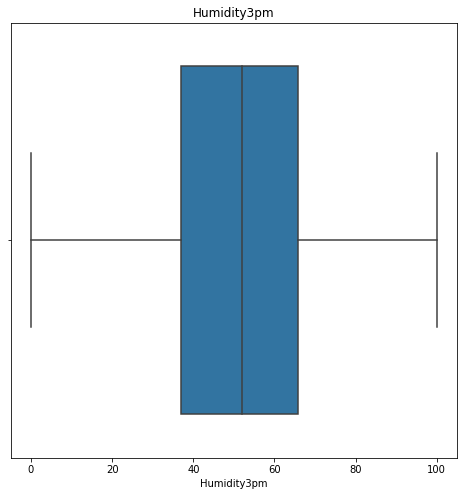

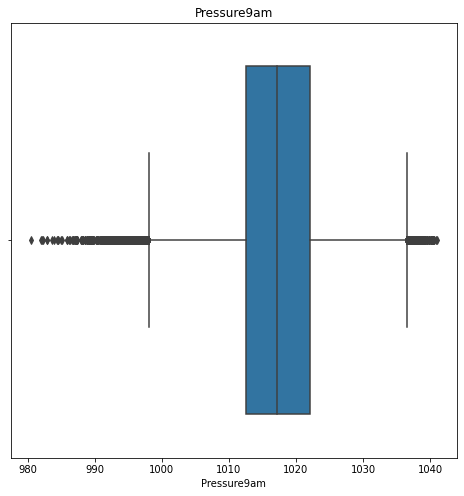

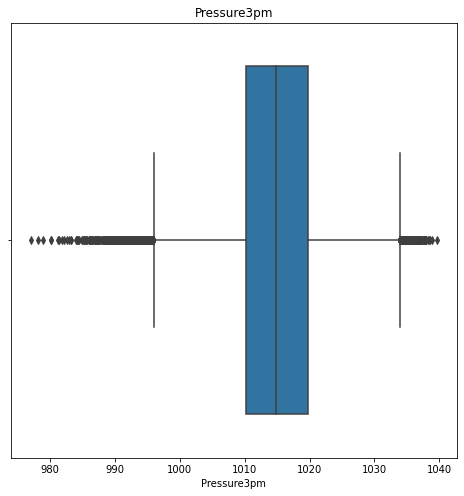

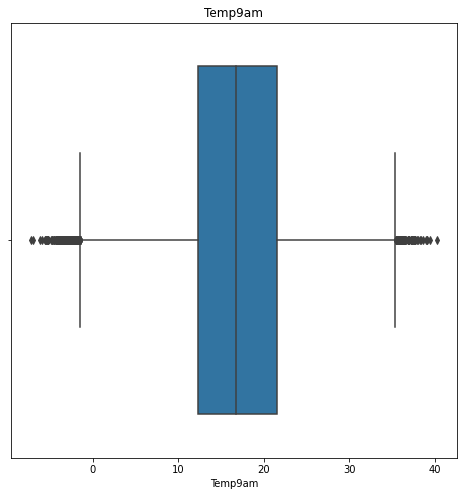

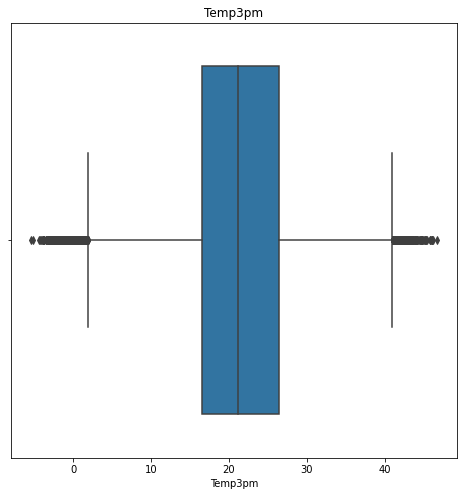

<Figure size 576x576 with 0 Axes>

In [46]:
# Boxplots

for feature in wth_nd_continuous_feature:
  sb.boxplot(x=wth_nd[feature])
  plt.title(feature)
  plt.figure(figsize=(8,8))

In [47]:
def rem_outl(df,feature):
  Q1 = df[feature].quantile(0.25)
  Q3 = df[feature].quantile(0.75)
  IQR = Q3-Q1
  Lower_Limit = Q1-(3*IQR) # We choose 3 & not 1.5 to avoid data loss & overfitting
  Upper_Limit = Q3+(3*IQR) # We choose 3 & not 1.5 to avoid data loss & overfitting
  to_remove = df[(df[feature]<Lower_Limit)|(df[feature]>Upper_Limit)]
  labels_list = to_remove.index
  df = df.drop(labels=labels_list,axis=0)
  return df

In [48]:
wth_nd = rem_outl(wth_nd,"MinTemp")
wth_nd = rem_outl(wth_nd,"MaxTemp")
wth_nd = rem_outl(wth_nd,"Rainfall")
wth_nd = rem_outl(wth_nd,"Evaporation")
wth_nd = rem_outl(wth_nd,"WindGustSpeed")
wth_nd = rem_outl(wth_nd,"WindSpeed9am")
wth_nd = rem_outl(wth_nd,"WindSpeed3pm")
wth_nd = rem_outl(wth_nd,"Humidity9am")
wth_nd = rem_outl(wth_nd,"Humidity3pm")
wth_nd = rem_outl(wth_nd,"Pressure9am")
wth_nd = rem_outl(wth_nd,"Pressure3pm")
wth_nd = rem_outl(wth_nd,"Temp9am")
wth_nd = rem_outl(wth_nd,"Temp3pm")


### Checking Data after removing outliers

In [49]:
print('Shape of wth_nd after removing outliers', wth_nd.shape )

Shape of wth_nd after removing outliers (109441, 22)


# Data Insights

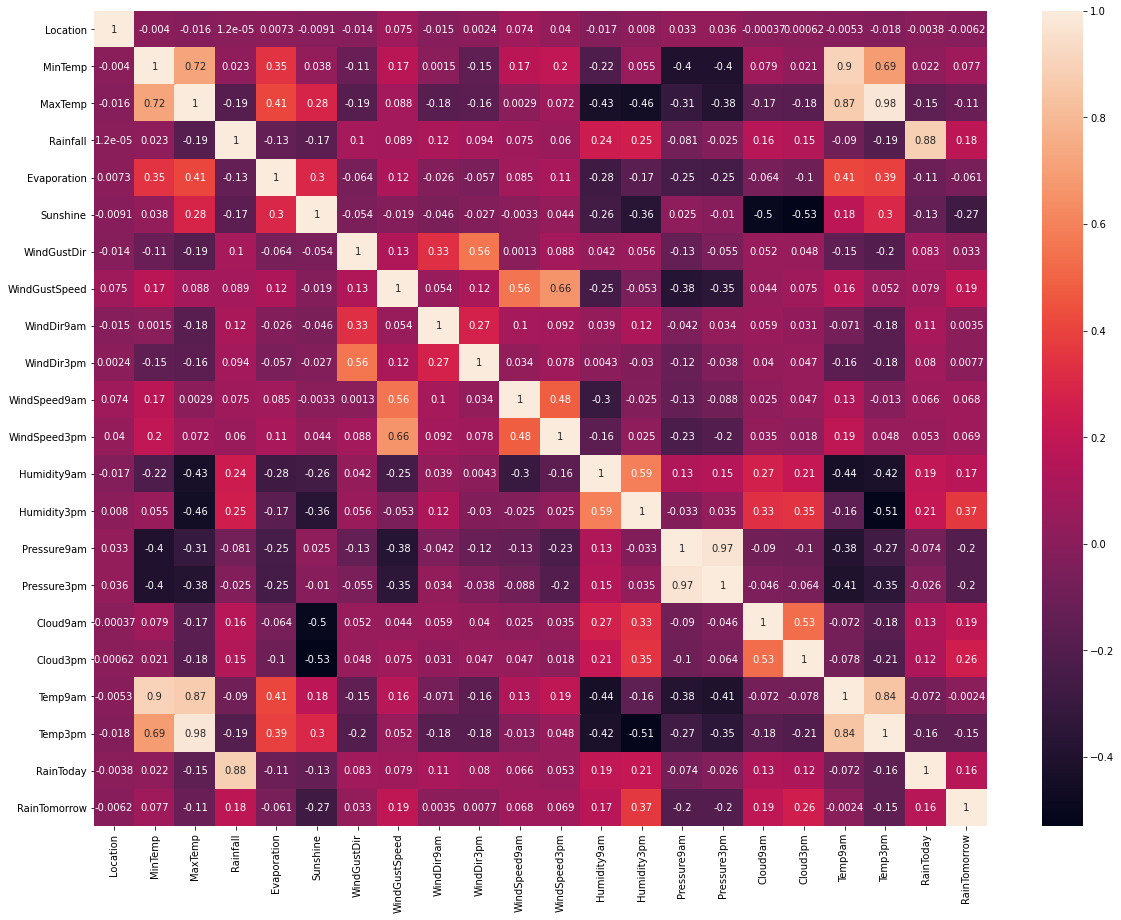

In [50]:
plt.figure(figsize=(20,15))
sb.heatmap(wth_nd.corr(),annot=True)
plt.show()

Positively Correlated Features -
1. Temp9am & MaxTemp
2. Temp3pm & MaxTemp
3. Temp9am & MinTemp
4. Rainfall & RainToday

Neagtively Correlated Features -
1. MaxTemp & Humidity9am
2. MaxTemp & Humidity3pm
3. MaxTemp & Pressure9am
4. MaxTemp & Pressure3pm
5. MinTemp & Pressure9am
6. MinTemp & Pressure3pm
7. Sunshine & Cloud9am
8. Sunshine & Cloud3pm

Let's check some correlations graphically

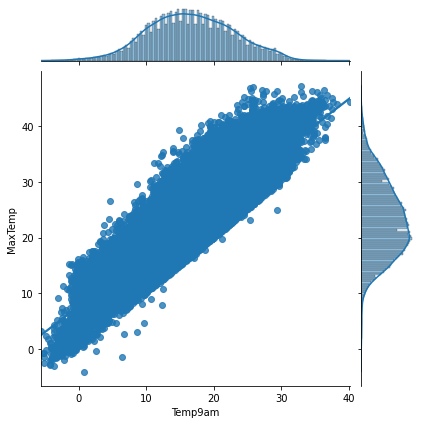

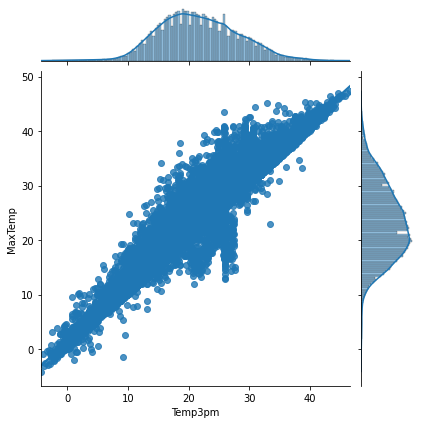

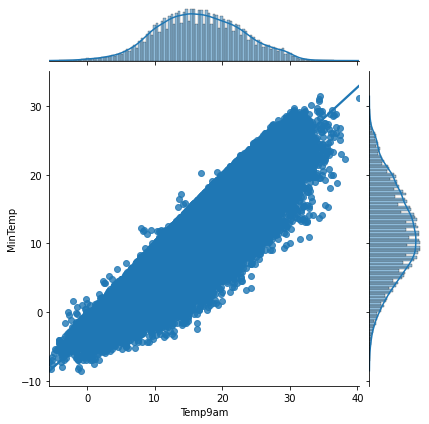

In [51]:
sb.jointplot(data=wth_nd, x="Temp9am", y="MaxTemp", kind="reg")
sb.jointplot(data=wth_nd, x="Temp3pm", y="MaxTemp", kind="reg")
sb.jointplot(data=wth_nd, x="Temp9am", y="MinTemp", kind="reg")

# Creating Function For Model Evaluation

In [52]:
def Mod_Eval(Model_name,y_test,y_pred):
  acc_score = accuracy_score(y_test,y_pred)
  conf_mat = confusion_matrix(y_test,y_pred)
  class_rep = classification_report(y_test,y_pred)
  print(f"{Model_name} : -")
  print(f"Accuracy of {Model_name} : {acc_score*100} %\n")
  print(f"Confusion Matrix of {Model_name} : \n{conf_mat}\n")
  print(f"Classification Report of {Model_name} : \n{class_rep}")

# Models Requiring Normalization

## Normalisation (Feature Scaling)

In [53]:
scaler = preprocessing.StandardScaler()

In [54]:
X_unscaled = wth_nd.drop(["RainTomorrow"], axis=1)
y = wth_nd["RainTomorrow"]

In [55]:
X_scaled = scaler.fit_transform(X_unscaled)

## Train test splitting

In [56]:
X_train_norm, X_test_norm, y_train_norm, y_test_norm = train_test_split(X_scaled,y,test_size =0.2)

## Models

### Logistic Regression

In [57]:
# Creating Model

Log_reg = LogisticRegression()

In [58]:
# Training Model

t0=time.time()
Log_reg.fit(X_train_norm, y_train_norm)
t1=time.time()
print(f"Time needed to train the model : {t1-t0} sec or {((t1-t0)/60)} min")

Time needed to train the model : 0.7412807941436768 sec or 0.012354679902394613 min


In [59]:
# Predictions By Model

t0=time.time()
y_pred = Log_reg.predict(X_test_norm)
t1=time.time()
print(f"Time taken by model for prediction : {t1-t0} sec or {((t1-t0)/60)} min")

Time taken by model for prediction : 0.0008623600006103516 sec or 1.4372666676839192e-05 min


In [60]:
# Model Evaluation
Mod_Eval("Logistic Regression",y_test_norm,y_pred)

Logistic Regression : -
Accuracy of Logistic Regression : 85.97469048380465 %

Confusion Matrix of Logistic Regression : 
[[17545   653]
 [ 2417  1274]]

Classification Report of Logistic Regression : 
              precision    recall  f1-score   support

           0       0.88      0.96      0.92     18198
           1       0.66      0.35      0.45      3691

    accuracy                           0.86     21889
   macro avg       0.77      0.65      0.69     21889
weighted avg       0.84      0.86      0.84     21889



### Support Vector Machine (SVM)

In [61]:
# Creating Model

SVM = svm.SVC()

In [62]:
# Training Model

t0=time.time()
SVM.fit(X_train_norm,y_train_norm)
t1=time.time()
print(f"Time needed to train the model : {t1-t0} sec or {((t1-t0)/60)} min")

Time needed to train the model : 335.3633556365967 sec or 5.589389260609945 min


In [63]:
# Predictions By Model

t0=time.time()
y_pred = SVM.predict(X_test_norm)
t1=time.time()
print(f"Time taken by model for prediction : {t1-t0} sec or {((t1-t0)/60)} min")

Time taken by model for prediction : 22.3517484664917 sec or 0.37252914110819496 min


In [64]:
# Model Evaluation

Mod_Eval("Support Vector Machine",y_test_norm,y_pred)

Support Vector Machine : -
Accuracy of Support Vector Machine : 86.88382292475673 %

Confusion Matrix of Support Vector Machine : 
[[17816   382]
 [ 2489  1202]]

Classification Report of Support Vector Machine : 
              precision    recall  f1-score   support

           0       0.88      0.98      0.93     18198
           1       0.76      0.33      0.46      3691

    accuracy                           0.87     21889
   macro avg       0.82      0.65      0.69     21889
weighted avg       0.86      0.87      0.85     21889



# Other Models

## Train Test Splitting

In [65]:
X = wth_nd.drop(["RainTomorrow"], axis=1)
y = wth_nd["RainTomorrow"]

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size =0.2)

## Models

### Decision Tree

In [67]:
# Creating Model

Dec_tree = DecisionTreeClassifier(criterion="entropy")

In [68]:
# Training Model

t0=time.time()
Dec_tree.fit(X_train,y_train)
t1=time.time()
print(f"Time needed to train the model : {t1-t0} sec or {((t1-t0)/60)} min")

Time needed to train the model : 1.728759527206421 sec or 0.028812658786773682 min


In [69]:
# Predictions By Model

t0=time.time()
y_pred = Dec_tree.predict(X_test)
t1=time.time()
print(f"Time taken by model for prediction : {t1-t0} sec or {((t1-t0)/60)} min")

Time taken by model for prediction : 0.009985923767089844 sec or 0.00016643206278483074 min


In [70]:
# Model Evaluation

Mod_Eval("Decission True",y_test,y_pred)

Decission True : -
Accuracy of Decission True : 80.47421079080817 %

Confusion Matrix of Decission True : 
[[15915  2168]
 [ 2106  1700]]

Classification Report of Decission True : 
              precision    recall  f1-score   support

           0       0.88      0.88      0.88     18083
           1       0.44      0.45      0.44      3806

    accuracy                           0.80     21889
   macro avg       0.66      0.66      0.66     21889
weighted avg       0.81      0.80      0.81     21889



### Random Forest Classifier (RFC)

In [71]:
# Creating Model

Ran_tree=RandomForestClassifier(criterion="entropy")

In [72]:
# Training Model

t0=time.time()
Ran_tree.fit(X_train,y_train)
t1=time.time()
print(f"Time needed to train the model : {t1-t0} sec or {((t1-t0)/60)} min")

Time needed to train the model : 25.534518003463745 sec or 0.4255753000577291 min


In [73]:
# Predictions By Model

t0=time.time()
y_pred=Ran_tree.predict(X_test)
t1=time.time()
print(f"Time taken by model for prediction : {t1-t0} sec or {((t1-t0)/60)} min")

Time taken by model for prediction : 0.5245251655578613 sec or 0.008742086092631022 min


In [74]:
# Model Evaluation

Mod_Eval("Random Forest Classifier",y_test,y_pred)

Random Forest Classifier : -
Accuracy of Random Forest Classifier : 86.98889853350998 %

Confusion Matrix of Random Forest Classifier : 
[[17634   449]
 [ 2399  1407]]

Classification Report of Random Forest Classifier : 
              precision    recall  f1-score   support

           0       0.88      0.98      0.93     18083
           1       0.76      0.37      0.50      3806

    accuracy                           0.87     21889
   macro avg       0.82      0.67      0.71     21889
weighted avg       0.86      0.87      0.85     21889



### XGBoost Classifier

In [75]:
# Creating Model

xgb = XGBClassifier()

In [76]:
# Training Model

t0=time.time()
xgb.fit(X_train,y_train)
t1=time.time()
print(f"Time needed to train the model : {t1-t0} sec or {((t1-t0)/60)} min")

Time needed to train the model : 5.936737298965454 sec or 0.09894562164942423 min


In [77]:
# Predictions By Model

t0=time.time()
y_pred = xgb.predict(X_test)
t1=time.time()
print(f"Time taken by model for prediction : {t1-t0} sec or {((t1-t0)/60)} min")

Time taken by model for prediction : 0.08643746376037598 sec or 0.0014406243960062663 min


In [78]:
# Model Evaluation

Mod_Eval("XGBoost Classifier",y_test,y_pred)

XGBoost Classifier : -
Accuracy of XGBoost Classifier : 86.51377404175614 %

Confusion Matrix of XGBoost Classifier : 
[[17589   494]
 [ 2458  1348]]

Classification Report of XGBoost Classifier : 
              precision    recall  f1-score   support

           0       0.88      0.97      0.92     18083
           1       0.73      0.35      0.48      3806

    accuracy                           0.87     21889
   macro avg       0.80      0.66      0.70     21889
weighted avg       0.85      0.87      0.85     21889



### CatBoost Classifier

In [79]:
# Creating Model

cat_boost = CatBoostClassifier()

In [80]:
# Training Model

t0=time.time()
cat_boost.fit(X_train, y_train)
t1=time.time()
print(f"Time needed to train the model : {t1-t0} sec or {((t1-t0)/60)} min")

Learning rate set to 0.069548
0:	learn: 0.6397467	total: 85ms	remaining: 1m 24s
1:	learn: 0.5960360	total: 110ms	remaining: 54.6s
2:	learn: 0.5570128	total: 136ms	remaining: 45.1s
3:	learn: 0.5247697	total: 161ms	remaining: 40.2s
4:	learn: 0.4985762	total: 186ms	remaining: 37s
5:	learn: 0.4777709	total: 217ms	remaining: 36s
6:	learn: 0.4591848	total: 248ms	remaining: 35.2s
7:	learn: 0.4435997	total: 275ms	remaining: 34.1s
8:	learn: 0.4307144	total: 310ms	remaining: 34.1s
9:	learn: 0.4178666	total: 337ms	remaining: 33.4s
10:	learn: 0.4081273	total: 368ms	remaining: 33.1s
11:	learn: 0.4003058	total: 394ms	remaining: 32.4s
12:	learn: 0.3925761	total: 429ms	remaining: 32.6s
13:	learn: 0.3860893	total: 458ms	remaining: 32.2s
14:	learn: 0.3805128	total: 484ms	remaining: 31.8s
15:	learn: 0.3765129	total: 518ms	remaining: 31.9s
16:	learn: 0.3724503	total: 547ms	remaining: 31.6s
17:	learn: 0.3682141	total: 575ms	remaining: 31.4s
18:	learn: 0.3650251	total: 604ms	remaining: 31.2s
19:	learn: 0.36

In [81]:
# Predictions By Model

t0=time.time()
y_pred = cat_boost.predict(X_test)
t1=time.time()
print(f"Time taken by model for prediction : {t1-t0} sec or {((t1-t0)/60)} min")

Time taken by model for prediction : 0.04155588150024414 sec or 0.000692598025004069 min


In [82]:
# Model Evaluation

Mod_Eval("CatBoost Classifier",y_test,y_pred)

CatBoost Classifier : -
Accuracy of CatBoost Classifier : 87.57366713874549 %

Confusion Matrix of CatBoost Classifier : 
[[17518   565]
 [ 2155  1651]]

Classification Report of CatBoost Classifier : 
              precision    recall  f1-score   support

           0       0.89      0.97      0.93     18083
           1       0.75      0.43      0.55      3806

    accuracy                           0.88     21889
   macro avg       0.82      0.70      0.74     21889
weighted avg       0.87      0.88      0.86     21889



# Predictions Converting to csv

CatBoost classifier's predictions can be turned again to csv

In [83]:
y_test = le_rain_tom.inverse_transform(y_test)
y_pred = le_rain_tom.inverse_transform(y_pred)

In [84]:
print(y_test)

['No' 'Yes' 'No' ... 'No' 'Yes' 'No']


In [85]:
print(y_pred)

['No' 'No' 'No' ... 'No' 'No' 'No']


In [86]:
y_test = y_test.reshape(-1,1)
y_pred = y_pred.reshape(-1,1)

In [87]:
con = np.concatenate((y_test,y_pred),axis=1)
wth_result = pd.DataFrame(con,columns=["Original","Prediction"])

In [88]:
wth_result.head(15)

,Original,Prediction
0,No,No
1,Yes,No
2,No,No
3,No,No
4,No,No
5,No,No
6,No,No
7,No,No
8,No,No
9,No,No


In [89]:
# Uncomment the code below to get csv file

# wth_result.to_csv("CatPred.csv")

# Pickling models & predicting with it

In [90]:
# Function To Pickle Model

def Mod_pkl(model_name,model):
  pickle.dump(model,open(f"{model_name}.pkl",'wb'))

In [91]:
# Function To Load Pickled Model

def Load_pkl(model_name,model):
   return pickle.load(open(f"/content/{model_name}.pkl",'rb')) # For Google Colab
  # return pickle.load(open(f"/pickles/{model_name}.pkl",'rb')) # For Local Device

In [92]:
# Function For Predicting From Pickled Model

def pkl_pred(model_name,model,data):

  def Load_pkl(model_name,model):
    return pickle.load(open(f"/content/{model_name}.pkl",'rb')) # For Google Colab
  # return pickle.load(open(f"/pickles/{model_name}.pkl",'rb')) # For Local Device
  
  loaded_model = Load_pkl(model_name,model)

  try:
    array = np.array(data)
    array = array.reshape(1,-1)
  except:
    array = data.reshape(1,-1)
  
  prediction = Load_pkl(model_name,model).predict(array)
  pred = le_rain_tom.inverse_transform(prediction)
  print(f"{(pred)[0]} or {(prediction)[0]}")
  try:
    if prediction==0:
      print("It will be sunny day tomorrow.")
    else:
      print("It will rain tomorrow.")
  except:
    if pred=="No":
      print("It will be sunny day tomorrow.")
    else:
      print("It will rain tomorrow.")    

Let's make predictions

In [93]:
Mod_pkl("cat",cat_boost)

In [94]:
pkl_pred("cat",cat_boost,wth_nd.iloc[33551,:-1])

Yes or 1
It will rain tomorrow.


Let's check original value

In [95]:
wth_nd.iloc[33551,-1]

1

That means it has rained on this day & our prediction is true. Let's take anthother example.

In [96]:
test_row = wth.iloc[2255,1:-1]
test_row

Location          Albury
MinTemp              7.5
MaxTemp             23.7
Rainfall               0
Evaporation      5.46823
Sunshine         7.61118
WindGustDir            W
WindGustSpeed         22
WindDir9am             N
WindDir3pm             W
WindSpeed9am           2
WindSpeed3pm          13
Humidity9am           85
Humidity3pm           37
Pressure9am       1019.1
Pressure3pm       1015.6
Cloud9am         4.44746
Cloud3pm         4.50993
Temp9am             13.5
Temp3pm             23.2
RainToday             No
Name: 2255, dtype: object

In [97]:
test_row["Location"] = le_loc.transform([test_row["Location"]])[0]
test_row["WindGustDir"] = le_wind_gust.transform([test_row["WindGustDir"]])[0]
test_row["WindDir9am"] = le_dir9.transform([test_row["WindDir9am"]])[0]
test_row["WindDir3pm"] = le_dir3.transform([test_row["WindDir3pm"]])[0]
test_row["RainToday"] = le_rain_tod.transform([test_row["RainToday"]])[0]

In [98]:
pkl_pred("cat",cat_boost,test_row)

No or 0
It will be sunny day tomorrow.


In [99]:
# Original Value

wth.iloc[2255,-1]

'No'

# Conclusion

The models with highest accuracy & working within less time are -
1. CatBoost Classifier
2. XgBoost Classifier
3. Random Forest Classifier